In [1]:
import os
import sys
import cairosvg
import numpy as np
from mindquantum.core.gates import *
from IPython.display import display_svg
from mindquantum.core.circuit import Circuit
from mindquantum.core import ParameterResolver

sys.path.append('../..')
np.set_printoptions(linewidth=1000)
from utils import qutrit_symmetric_ansatz


def draw_svg(ansatz: Circuit, name: str, ext: str = 'pdf', dpi: int = 400, scale: int = 8):
    path = os.path.join(os.getcwd(), f'{name}_svg')
    svg = f'{path}.svg'
    circ = Circuit()
    count = 0
    for gate in ansatz:
        if 'X' not in gate.name and len(gate.coeff.params_name) == 1:
            count += 1
            gate.coeff = ParameterResolver(f'θ{count}')
        circ += gate
    circ_svg = circ.svg()
    circ_svg.to_file(svg)
    display_svg(circ_svg)
    if 'png' in ext:
        cairosvg.svg2png(url=svg, write_to=f'{path}.png', dpi=dpi, scale=scale)
    elif 'pdf' in ext:
        cairosvg.svg2pdf(url=svg, write_to=f'{path}.pdf', dpi=dpi, scale=scale)
    else:
        raise ValueError(f'Wrong input extension: {ext}')
    if os.path.exists(svg):
        os.remove(svg)


def draw_pdf(ansatz: Circuit, name: str, prefix: str, suffix: str):
    name = f'{name}_qpic.qpic'
    with open(name, 'w') as f:
        f.write(prefix)
        ind = 0
        for gate in ansatz:
            line, count = draw_qpic(gate, ind)
            ind = count
            f.write(f'{line}\n')
        f.write(suffix)
    os.system(f'python qpic {name} -f pdf')


def draw_qpic(gate: BasicGate, ind: int):
    line = f'Some thing go wrong {str(gate)}'
    name = gate.name
    obj = gate.obj_qubits
    ctrl = gate.ctrl_qubits
    pi2 = r'\frac{\pi}{2}'
    if len(ctrl) > 0:
        ctrl_str = ' '.join([f'q{c}' for c in ctrl])
        if 'X' == name:
            line = f'+q{obj[0]} {ctrl_str}'
        elif 'RY' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ {ctrl_str} width=28'
                elif ind >= 10 and ind < 100:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ {ctrl_str} width=32'
                else:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ {ctrl_str} width=36'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $R_y(-{pi2})$ {ctrl_str} width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $R_y({pi2})$ {ctrl_str} width=28'
                else:
                    raise ValueError(f'Some thing go wrong {gate}')
            else:
                raise ValueError(f'Some thing go wrong {gate}')
        elif 'RZ' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $R_z(\\theta_{{{ind}}})$ {ctrl_str} width=28'
                elif ind >= 10 and ind < 100:
                    line = f'q{obj[0]} G $R_z(\\theta_{{{ind}}})$ {ctrl_str} width=32'
                else:
                    line = f'q{obj[0]} G $R_z(\\theta_{{{ind}}})$ {ctrl_str} width=36'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $R_z(-{pi2})$ {ctrl_str} width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $R_z({pi2})$ {ctrl_str} width=28'
                else:
                    raise ValueError(f'Some thing go wrong {gate}')
            else:
                raise ValueError(f'Some thing go wrong {gate}')
        elif 'GP' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $GP(\\theta_{{{ind}}})$ {ctrl_str} width=32'
                elif ind >= 10 and ind < 100:
                    line = f'q{obj[0]} G $GP(\\theta_{{{ind}}})$ {ctrl_str} width=36'
                else:
                    line = f'q{obj[0]} G $GP(\\theta_{{{ind}}})$ {ctrl_str} width=40'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $GP(-{pi2})$ {ctrl_str} width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $GP({pi2})$ {ctrl_str} width=28'
                else:
                    raise ValueError(f'Some thing go wrong {gate}')
        else:
            raise ValueError(f'Some thing go wrong {gate}')
    else:
        if 'X' == name:
            line = f'q{obj[0]} G $X$'
        elif 'RY' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ width=28'
                elif ind >= 10 and ind < 100:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ width=32'
                else:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ width=36'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $R_y(-{pi2})$ width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $R_y({pi2})$ width=28'
                else:
                    raise ValueError(f'Some thing go wrong {gate}')
        else:
            raise ValueError(f'Some thing go wrong {gate}')
    return line, ind

`controlled_diagonal_synthesis()`
- GlobalPhase是否可以用PhaseShift替换

`circuit_decomposition()`
- 检查是否还有别的可化简的部分
- 重构一份通用的电路遍历查找函数 写成.py


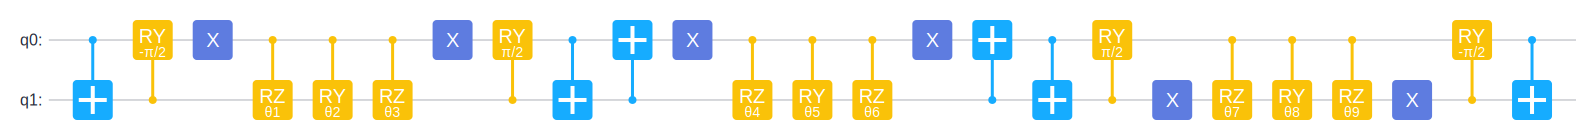

In [2]:
prefix = r'''GATESIZE 14
DEPTHPAD 2
WIREPAD 6
q0 W
q1 W
q0 LABEL width=0
q0 q1 G $U_\mathrm{enc}(\boldsymbol{\theta})$ width=32
q0 LABEL width=0
=
'''
suffix = 'q0 LABEL width=0'
nq = 2
mat = np.eye(2**nq)
obj = range(nq)[::-1]
gate = UnivMathGate('', mat).on(obj)
ansatz = qutrit_symmetric_ansatz(gate)
draw_pdf(ansatz, 'single_qutrit', prefix, suffix)
draw_svg(ansatz, 'single_qutrit')

In [3]:
prefix = r'''GATESIZE 14
DEPTHPAD 2
WIREPAD 6
q0 W
q1 W
q2 W
q3 W
q0 LABEL width=0
q0 q1 q2 q3 G $\large U_\mathrm{enc}(\boldsymbol{\theta})$ width=40
q0 LABEL width=0
=
'''
suffix = 'q2 LABEL width=0'
nq = 4
mat = np.eye(2**nq)
obj = range(nq)[::-1]
gate = UnivMathGate('U', mat).on(obj)
ansatz = qutrit_symmetric_ansatz(gate)
draw_pdf(ansatz, 'two_qutrit', prefix, suffix)
draw_svg(ansatz, 'two_qutrit')